# Taming Text

In this notebook we will explore a subset of the emails corpora from Hillary Clinton, published by [WikiLeaks](https://www.google.ch/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwjVmazl0PbQAhVDShQKHR1FAygQFggcMAA&url=https%3A%2F%2Fwikileaks.ch%2Fclinton-emails%2F&usg=AFQjCNFMLRMvATPtRGPEujCxT0ReaPWLWQ&sig2=tr5_7J0r2rNUrP-d5cbk6g).

    On March 16, 2016 WikiLeaks launched a searchable archive for over 30 thousand emails & email attachments sent 
    to and from Hillary Clinton's private email server while she was Secretary of State. The 50,547 pages of 
    documents span from 30 June 2010 to 12 August 2014. 7,570 of the documents were sent by Hillary Clinton. 
    The emails were made available in the form of thousands of PDFs by the US State Department as a result 
    of a Freedom of Information Act request. The final PDFs were made available on February 29, 2016.
    
The data that our analysis is based on, is available at [GitHub](https://github.com/ADAEPFL/Homework/tree/master/05%20-%20Taming%20Text/hillary-clinton-emails)

Our work consists of four parts:

1. **Word cloud** representing the words that are used most frequently
1. **Frequency and Sentiment Analysis** for the countries mentioned in the emails
1. **Topic modelling** for analyzing what topics are most discussed
1. A **Communication Graph** showing how the relations between senders and recievers


To view the notebook with interactive figures, please go to [nbviewer.jupyter.org](http://nbviewer.jupyter.org/github/PaluchowskiMatthew/ADA-Kepler/tree/master/05%20-%20Taming%20Text/)

We start by importing the libraries we are going to use, and loading the data:

In [1]:
# Normal stack of pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib import cm
import seaborn as sns
import nltk
from os import path
from wordcloud import WordCloud # pip install wordcloud
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
folder = 'hillary-clinton-emails/'
aliases = pd.read_csv(folder + 'Aliases.csv', index_col='Id')
email_receivers = pd.read_csv(folder + 'EmailReceivers.csv', index_col='Id')
emails = pd.read_csv(folder + 'Emails.csv', index_col='Id')
persons = pd.read_csv(folder + 'Persons.csv', index_col='Id')

In [3]:
aliases.head()

,Alias,PersonId
Id,,
1,111th congress,1
2,agna usemb kabul afghanistan,2
3,ap,3
4,asuncion,4
5,alec,5


In [4]:
email_receivers.head()

,EmailId,PersonId
Id,,
1,1,80
2,2,80
3,3,228
4,3,80
5,4,80


In [5]:
emails.head()

,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,MetadataDocumentClass,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
Id,,,,,,,,,,,,,,,,,,,,,
1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,HRC_Email_296,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,HRC_Email_296,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,HRC_Email_296,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,HRC_Email_296,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,HRC_Email_296,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [6]:
emails.columns

Index(['DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedDateSent', 'ExtractedCaseNumber', 'ExtractedDocNumber',
       'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull',
       'ExtractedBodyText', 'RawText'],
      dtype='object')

In [7]:
# We have a total of around 8000 emails
emails.shape

(7945, 21)

## Part 1: Word clouds

The goal of this part is to generate a word cloud representing the frequency of the words used in the emails, giving us some information about what is discussed most. 

We start by collecting the words from all the email bodies:

In [8]:
# Remove emails with no body text
emailsList = emails['ExtractedBodyText'].tolist()
cleanedList = [str(x) for x in emailsList if str(x) != 'nan']

In [9]:
# Get a raw string containing the text from all emails
rawExtractedBody = ' '.join(cleanedList)

In [10]:
# We define a helper function to generate the word cloud
import random
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(80, 100)

def generate_word_cloud(text):
    mask = np.array(Image.open("hillary_mask_1.jpg"))
    
    # Generate a word cloud image
    wordcloud = WordCloud(mask=mask, max_words=200, max_font_size=30, color_func=grey_color_func, width=500,  height=400).generate(text)
    
    # Display the generated image:
    plt.imshow(wordcloud)
    plt.axis("off")
    
    fig = plt.gcf()
    fig.set_size_inches(12, 10)

We are now ready to do a first version of our word cloud:

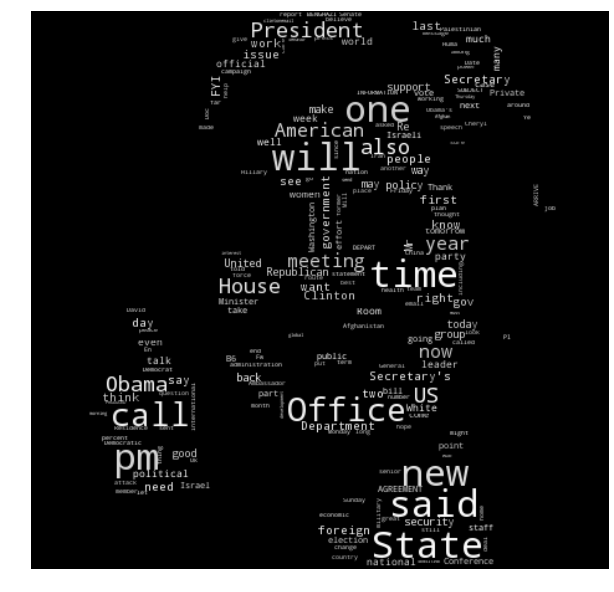

In [11]:
generate_word_cloud(rawExtractedBody)

We see that we can allready get a feeling about what is beeing discussed in the emails, however there are also a lot of words with little meaning. We therefore do some more preprocessing, to see if we can get an even better result.

### Preprosessing

We want to remove words containing little information, while perserving the informative terms. There are many methods to achieve this goal, but we went with the following approach:

- Tokenizing
- Case unification
- Removing words not in the english dictionary
- Stop word removal
- Removing 'short' words

Tokenization is the act of deviding a text into 'tokens', or words. We use the word_tokenizer from the python nltk (Natural Language Toolkit) library:

In [12]:
from nltk.tokenize import word_tokenize

tokens = pd.Series(word_tokenize(rawExtractedBody))
tokens.head()

0          B6
1    Thursday
2           ,
3       March
4           3
dtype: object

We don't care about the case of the words, so we convert everything to lower case:

In [13]:
lowered_tokens = tokens.apply(lambda token: token.strip().lower())

lowered_tokens = lowered_tokens[lowered_tokens != '']
lowered_tokens.head()

0          b6
1    thursday
2           ,
3       march
4           3
dtype: object

### Removing non-english words

The emails contains a lot of short abbreviations, like 'b6' in the list above. To do a simple filtering of meaningfull words, we filter out all words not contained in the wordlist of nltk. This has some downsides, for instance will names of politicians allso be filtered by this approach.

In [14]:
from nltk.corpus import words
print(words.readme())

english = set(words.words())

Wordlists

en: English, http://en.wikipedia.org/wiki/Words_(Unix)
en-basic: 850 English words: C.K. Ogden in The ABC of Basic English (1932)



In [15]:
english = set(words.words())
filter_english = lowered_tokens.apply(lambda x: x in english)

valid_tokens = lowered_tokens[filter_english]
valid_tokens.head(10)

3      march
9          h
11    latest
12       how
14        is
17       and
18      more
22      memo
29      memo
34     march
dtype: object

### Stopword removal

Stopwords are words that are used so frequently that they provide no added information, like 'a', 'and', 'the' etc. We filter out all words contained in nltk's english stopword list:

In [16]:
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))

stopword_filter = valid_tokens.apply(lambda x: x not in stop)
nonstop_tokens = valid_tokens[stopword_filter]

In [17]:
nonstop_tokens.head(15)

3       march
9           h
11     latest
22       memo
29       memo
34      march
42          h
50      march
60          h
62     latest
74       memo
80      print
83      print
88          h
107      meet
dtype: object

### Remove 'short' words

Even after removing stopwords, we see that there are a lot of short words with no added value, like the 'h' we can see above. Under the assumption that words with length <= 3 has little expressiveness, we chose to remove them:

In [18]:
short_filter = nonstop_tokens.apply(lambda token: len(token) > 3)

long_tokens = nonstop_tokens[short_filter]
long_tokens.head(15)

3          march
11        latest
22          memo
29          memo
34         march
50         march
62        latest
74          memo
80         print
83         print
107         meet
110    extremist
111       behind
113         film
115      sparked
dtype: object

In [19]:
cleaned_words = long_tokens

In [20]:
cleaned_words.shape

(195337,)

In [21]:
tokens.shape

(697009,)

In [22]:
print('Our cleaning took away %.2f%% of the original words' % (100*(1 - cleaned_words.shape[0] / tokens.shape[0])))

Our cleaning took away 71.97% of the original words


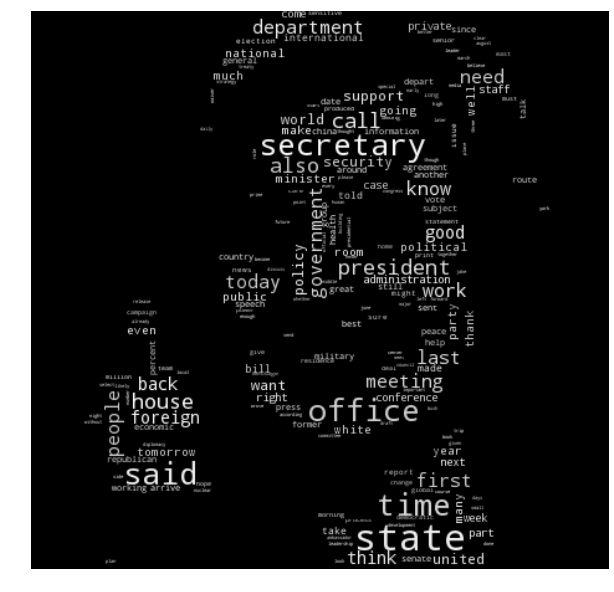

In [23]:
generate_word_cloud(cleaned_words.to_string(index=False, header=False))

We now observe that most of the words seems to have some expressiveness, and that words like state, office, president and secretary are common. 

## Part 2: Frequency and Sentiment Analysis for Countries

In the second part of our work, we will try to analyse which countries are mentioned, how frequently they are mentioned, and how the sentiment are related to each country.

Again, we start by doing some cleaning, this time on each email: 

In [24]:
# Represent the emails in a DateSeries format
emailsList = pd.Series(emails['ExtractedBodyText'].astype(str))

In [25]:
# Drop empty emails
emailsList = emailsList[emailsList.apply(lambda x: x != 'nan')]

### Country lookup

To connect the emails to a country, we take the country that is mentioned the most, if any, for each email. 

We first used the lookup function of the pycountry library, but observed that this gave us a lot of false positives, as words like pm was matched with "Saint Pierre and Miquelon", which thus ended the most mentioned country. However we believe that these short abbreviations are more often used to express other terms (pm ?= prime minister), and will therefore restrict our search to match on full country names. 

Our approach of searching for full country names in each email also solves the problem of tokenizing countries whos name consists of more than one word, like "United States of America". Doing a lookup of single terms could fail on recognizing this, while our reverse search handles these cases easily.

After observing that mentions of USA and UK is frequently used, we add the short forms of these countries as an exception. 

In [26]:
import pycountry
len(pycountry.countries)

249

In [27]:
countries = [{'name': c.name, 'short_name': c.alpha_2} for c in pycountry.countries]

In [28]:
import re

# Function to find the most frequently mentioned country in a text (email)
def lookup_country(email):
    counts = {}
    
    # Split email on words
    words = re.findall(r"[\w']+", email)
    
    for country in countries:
        count = 0
        
        count += email.count(country['name'])        
        
        # Count also short names for UK and USA
        if country['name'] == 'United States':
            count += words.count('USA')
            count += words.count('US')
            count += words.count('U.S.')
            count += words.count('U.S.A')
            
        elif country['name'] == 'United Kingdom':
            count += words.count('UK')
            count += words.count('U.K.')
            count += words.count('GB')
            count += words.count('G.B.')
        
        # If there are any matches
        if count != 0:
            counts[country['name']] = count
            
    if counts:
        # Get the country with highest count  
        top_country = max(counts, key=counts.get)
        return top_country
    else:
        return

In [29]:
# Test of the lookup function
lookup_country("Norway United States Poland Poland Poland Norway, GB, UK, USA")

'Poland'

In [30]:
country_mentioned = emailsList.apply(lookup_country)

In [31]:
# Total number of countries mentioned:
len(country_mentioned.value_counts())

98

In [32]:
# Counts for the top 20 countries:
country_mentioned.value_counts().head(20)

United States     147
Israel             72
Haiti              68
Afghanistan        50
China              49
Libya              49
Pakistan           38
India              36
United Kingdom     26
Ireland            23
Iraq               22
Mexico             20
Honduras           18
Turkey             16
Cuba               13
Qatar              12
Egypt              11
Colombia           11
Palau              10
Sri Lanka          10
Name: ExtractedBodyText, dtype: int64

### Sentimental analysis

The next step is to extract the sentiment of each email. We use a model already trained for this task, and apply classify each email as either positive or negative. 


#### Step 1: Cleaning
Similar to previously used procedure: remove stopwords, filter on english words etc. 

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [34]:
tokenized = emailsList.apply(word_tokenize)
tokenized.head()

Id
2    [B6, Thursday, ,, March, 3, ,, 2011, 9:45, PM,...
3                                                [Thx]
5    [H, <, hrod17, @, clintonemail.com, >, Friday,...
6    [Pis, print, ., -•-, ..., -^, H, <, hrod17, @,...
8    [H, <, hrod17, @, clintonemail.corn, >, Friday...
Name: ExtractedBodyText, dtype: object

In [35]:
english_filtered = tokenized.apply(lambda tokens: [token.lower() for token in tokens if token in english])
english_filtered.head()

Id
2    [thursday, march, h, is, and, more, sid, memo,...
3                                                   []
5    [h, friday, march, huma, h, is, and, more, sid...
6    [print, h, wednesday, september, the, meat, we...
8    [h, friday, march, huma, h, is, and, more, sid...
Name: ExtractedBodyText, dtype: object

In [36]:
no_stopwords = english_filtered.apply(lambda x: [w for w in x if (w not in stop) and len(w)>1 ])

In [ ]:
no_stopwords.head()

Id
2    [thursday, march, sid, memo, memo, march, hill...
3                                                   []
5              [friday, march, huma, sid, memo, print]
6    [print, wednesday, september, meat, wednesday,...
8              [friday, march, huma, sid, memo, print]
Name: ExtractedBodyText, dtype: object

#### Step 2: Sentiment analysis

In [ ]:
sent_analyzer = SentimentIntensityAnalyzer()
sentiments = no_stopwords.apply(lambda x: sent_analyzer.polarity_scores(' '.join(x)))

In [ ]:
# We tried different approaches for the sentiment classification, but ended up using the single compound value

def classify_sentiment(x):
    '''
    score = x['pos'] + x['neg']
    if score == 0:
        return 0
    elif score < 0:
        return -1
    else:
        return 1
    '''
    return x['compound']
    
scores = sentiments.apply(classify_sentiment)

In [ ]:
# The sentiment analyser tends to classify most of the emails as neutral. To better diverse our emails, 
# we say that only values above 0 is positive (1), while everything else is negative (-1)

def binary_score(x):
    if x > 0:
        return 1
    else:
        return -1

binary_score = scores.apply(binary_score)
binary_score.value_counts()

-1    4245
 1    2497
Name: ExtractedBodyText, dtype: int64

#### Step 3: aggregation

We now combine the sentiments and the country assignments, and aggregate a mention frequency and a mean sentiment for each country. 

In [ ]:
sentiments = pd.DataFrame(binary_score)
sentiments['country'] = country_mentioned

# Take the mean of all email sentiments for a country
country_sentiments = sentiments.groupby('country').mean().reset_index()
country_sentiments.columns = ['country', 'sentiment']

# Count how many times a country is assigned to an email
country_counts = sentiments.groupby('country').count().reset_index()

In [ ]:
country_sentiments.sort_values(by='sentiment').head(10)

,country,sentiment
18,Congo,-1.0
95,Yemen,-1.0
73,Philippines,-1.0
94,Uruguay,-1.0
60,Malta,-1.0
61,Mauritania,-1.0
31,Guam,-1.0
75,Portugal,-1.0
28,Ghana,-1.0
78,Samoa,-1.0


In [ ]:
# Dropping to get rid of the case where no country were mentioned
top_country_counts = country_counts.sort_values(by='ExtractedBodyText', ascending=False).drop(0)
top_country_counts.columns = ['country', 'count']

# We set up a threshold to limit the results.
treshold = 4
top_country_counts = top_country_counts[top_country_counts['count'] > treshold]

In [ ]:
chart_table = top_country_counts.join(country_sentiments.sentiment, how='left')

chart_table = chart_table.sort_values(by='sentiment', ascending=True)
chart_table

,country,count,sentiment
86,Sri Lanka,10,-0.600000
53,Libya,49,-0.346939
15,Chile,5,-0.200000
44,Japan,7,-0.142857
36,Honduras,18,-0.111111
17,Colombia,11,-0.090909
92,United Kingdom,26,-0.076923
39,Indonesia,6,0.000000
87,Sudan,8,0.000000
35,Haiti,68,0.029412


Creation of bar chart about the sentiment and frequency of countries mentioned in Hillary Clinton's emails. The coloring of the bars is reflecting the sentiment displayed in the legend on the right, where as it is a normalized scale over the value range and should be seen as such. Hence it should be noted that the positive sentiment range is larger than the negative sentiment range.

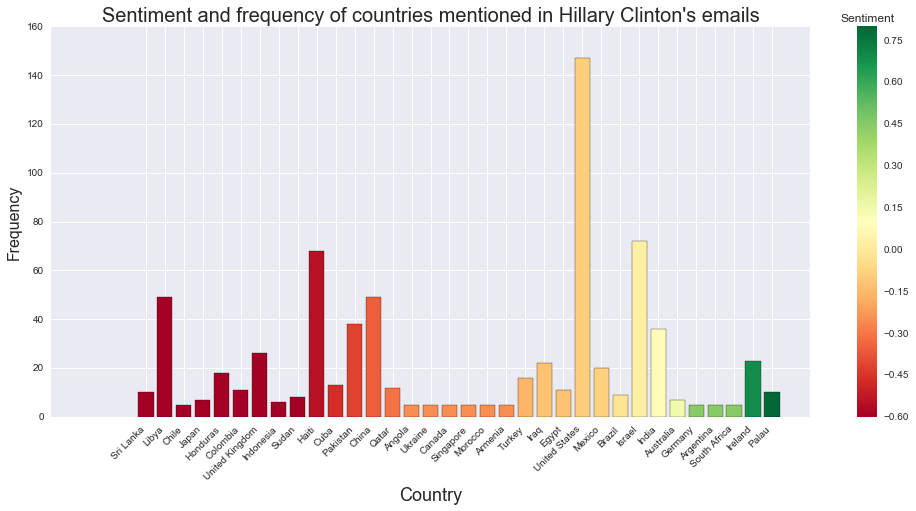

In [ ]:
chart_final = chart_table
index = range(chart_final.shape[0])

# Create legend color range
y = np.array(chart_final['sentiment'])
colors = cm.RdYlGn(y / float(max(y)))
plot = plt.scatter(y, y, c=y, cmap = 'RdYlGn')
plt.clf()
clb = plt.colorbar(plot)
clb.ax.set_title("Sentiment")

plt.bar(index, chart_final['count'], align='center', color=colors)
plt.xticks(rotation=45, ha='right')

LABELS = chart_final['country']
plt.xticks(index, LABELS, rotation=45)
plt.title('Sentiment and frequency of countries mentioned in Hillary Clinton\'s emails', fontsize=20)
plt.xlabel('Country', fontsize=18)
plt.ylabel('Frequency', fontsize=16)

fig = plt.gcf()
fig.set_size_inches(17, 7)

plt.show()

## Part 3: Topic modelling

In this part we want to model the topics which are being mentioned in the emails. In order to do that we use gensim package for Latent Dirichlet Allocation and its AWSOME visualization from pyLDAvis package.

In [ ]:
from gensim import corpora, models
NUM_TOPICS = 20

In [ ]:
# We reuse already cleaned emails from part 2
no_stopwords_list = no_stopwords.tolist()
dictionary = corpora.Dictionary(no_stopwords_list)
corpus = [dictionary.doc2bow(email) for email in no_stopwords_list]

Create Latent Dirichlet Allocation model

In [ ]:
model = models.LdaModel(corpus, id2word=dictionary, num_topics=NUM_TOPICS)

Top 10 terms for topics

In [ ]:
for i in range(0, NUM_TOPICS):
    temp = model.show_topic(i, 10)
    terms = []
    for term in temp:
        terms.append(term)
    print("Topic #" + str(i) + ": "+ ", ".join([str(i[0]) for i in terms]))


In [ ]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

import warnings
warnings.filterwarnings('ignore')

vis_data = gensimvis.prepare(model, corpus, dictionary)
pyLDAvis.display(vis_data)

We decided to model 20 topics since it yelded best results - we are not overflowed with topics while each one of them is quite meaningful and seems to be related to specific theme such as war in Iran, Presidential Election or natural disaster in Haiti. 

## BONUS task: Communication Graph

This task attempts to model the communities present within the communication patterns of the Clinton emails. Firstly we join the necessary tables to be able to extract sender/receiver edges.

In [ ]:
emails_with_receivers = email_receivers.join(emails, how='left', on='EmailId')
emails_with_receivers

We reduce the table to the necessary columns and add the preliminarily cleaned and tokenized no_stopwords email content columns

In [ ]:
graph_table = emails_with_receivers[['PersonId', 'SenderPersonId']]
graph_table['ExtractedBodyText'] = no_stopwords

graph_table.head(10)

Further we clean the sender column to be an integer and drop all NaN values

In [ ]:
graph_table_clean = graph_table.dropna(subset=[['PersonId', 'SenderPersonId']])
graph_table_clean['SenderPersonId'] = graph_table_clean['SenderPersonId'].astype(int)
graph_table_clean.head(10)

Then we build the actual graph with the NetworkX module

In [ ]:
import networkx as nx
G = nx.Graph()

graph_table_clean.apply(lambda row: G.add_edge(row['PersonId'], row['SenderPersonId']), axis=1)

print('Graph node samples', list(G.nodes())[0:10])
print('Graph edges samples', list(G.edges())[0:10])

We are consequently able to partition graph into communities and display the graph below

In [ ]:
import community as coty

# Compute the best partitions
partition = coty.best_partition(G)

# Draw resultin graph
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 30,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
fig = plt.gcf()
fig.set_size_inches(18, 10)

im = Image.open('hillary_mask_2.jpg')
fig.figimage(im, 850, 50,zorder=10)

plt.show()

Quick sanity check to ensure node count is according to received dictionary partitioning map

In [ ]:
print('Sanity check: ', len(list(G.nodes())) == len(partition))

From the community dictionary we add an additional column identifying the communities

In [ ]:
partition_table = graph_table_clean.copy()

partition_table['Community'] = partition_table.apply(lambda row: partition[row['SenderPersonId']], axis=1)
partition_table = partition_table[['Community', 'ExtractedBodyText']]

partition_table.head(10)

We analyse the size of the different communities

In [ ]:
partition_table['Community'].value_counts()

Some communites got dropped when cleaning out NaN values, which is ok, since they were micro communities only consisting of emails with no bodies


In [ ]:
group_partitions = partition_table.dropna().groupby('Community')
communities = group_partitions.agg(sum).reset_index()

communities

Displaying of the 20 most frequent words of each community:

In [ ]:
def get_20_most_frequent(token_list):
    return np.array(pd.Series(token_list).value_counts(ascending=False).head(20).keys())

communities['Most_common_words'] = communities['ExtractedBodyText'].apply(get_20_most_frequent)

most_common = communities.drop('ExtractedBodyText', axis=1)

#_ = most_common['Most_common_words'].apply(print)

with pd.option_context('display.max_rows', 999, 'display.max_columns', 2):
    print(most_common)


New table including the above most frequent words

The following algorithm attempts to assign the best matching LDA topic found in Exercise 3 to the communities found in the BONUS task and displays the findings:

In [ ]:
for idx,c in most_common.iterrows():
    max_top = -1
    max_words = 0
    top_words = []
    for i in range(0, NUM_TOPICS):
        mtop = model.show_topic(i, 10)
        topics = [i[0] for i in mtop]
        temp_words = set(c['Most_common_words']).intersection(topics)
        
        if(len(temp_words)>max_words):
            max_words = len(top_words)
            top_words = temp_words
            max_top = i
    if(max_top > -1):               
        print('Community ', c['Community'], '\twas closest to LDA topic ', max_top, '\twith the follwing intersecting words: ', top_words)